In [1]:
#Data cleaning
#Create ipynb file that:
#1. Imports required packages (you choose)
#2. Imports data from stash 'https://stash.danskenet.net/users/bb6586/repos/dsaeda2020q1/browse/CSI_data_final.csv'
#3. Find bad data, do something with it (your choice) & present before/after results

#importing the packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#importing data 
data = pd.read_csv ('https://raw.githubusercontent.com/olhamk/Exploratory_Data_Science_with_Python/master/CSI_data_final.csv?raw')

In [3]:
#top 5 rows
data.head() 

,Unnamed: 0,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome,phone
0,1,0,< 0 EUR,6,critical,furniture/appliances,1169,unknown,> 7 years,4,67,none,own,2,skilled,1,1740,1
1,2,1,1 - 200 EUR,48,good,furniture/appliances,5951,< 100 EUR,1 - 4 years,2,22,none,own,1,skilled,1,4963,0
2,3,0,unknown,12,critical,education,2096,< 100 EUR,4 - 7 years,3,49,none,own,1,unskilled,2,1214,0
3,4,0,< 0 EUR,42,good,furniture/appliances,7882,< 100 EUR,4 - 7 years,4,45,none,other,1,skilled,2,7077,0
4,5,1,< 0 EUR,24,poor,car,4870,< 100 EUR,1 - 4 years,4,53,none,other,2,skilled,2,5771,0


In [4]:
#dimensions of the data
data.shape

(1000, 18)

In [5]:
modified_data = data.drop(['Unnamed: 0', 'phone'], axis=1) 
#dropping the first and last columns as we don't really need them

In [6]:
modified_data.duplicated().sum() #checking whether there are any duplicates in the dataframe
#seems like there aren't any 

0

In [7]:
modified_data.info()
#there are only 629 non-null objects in the 'purpose' column, meaning that we have some missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
default                 1000 non-null int64
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 629 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
monthlyincome           1000 non-null int64
dtypes: int64(8), object(8)
memory usage: 125.1+ KB


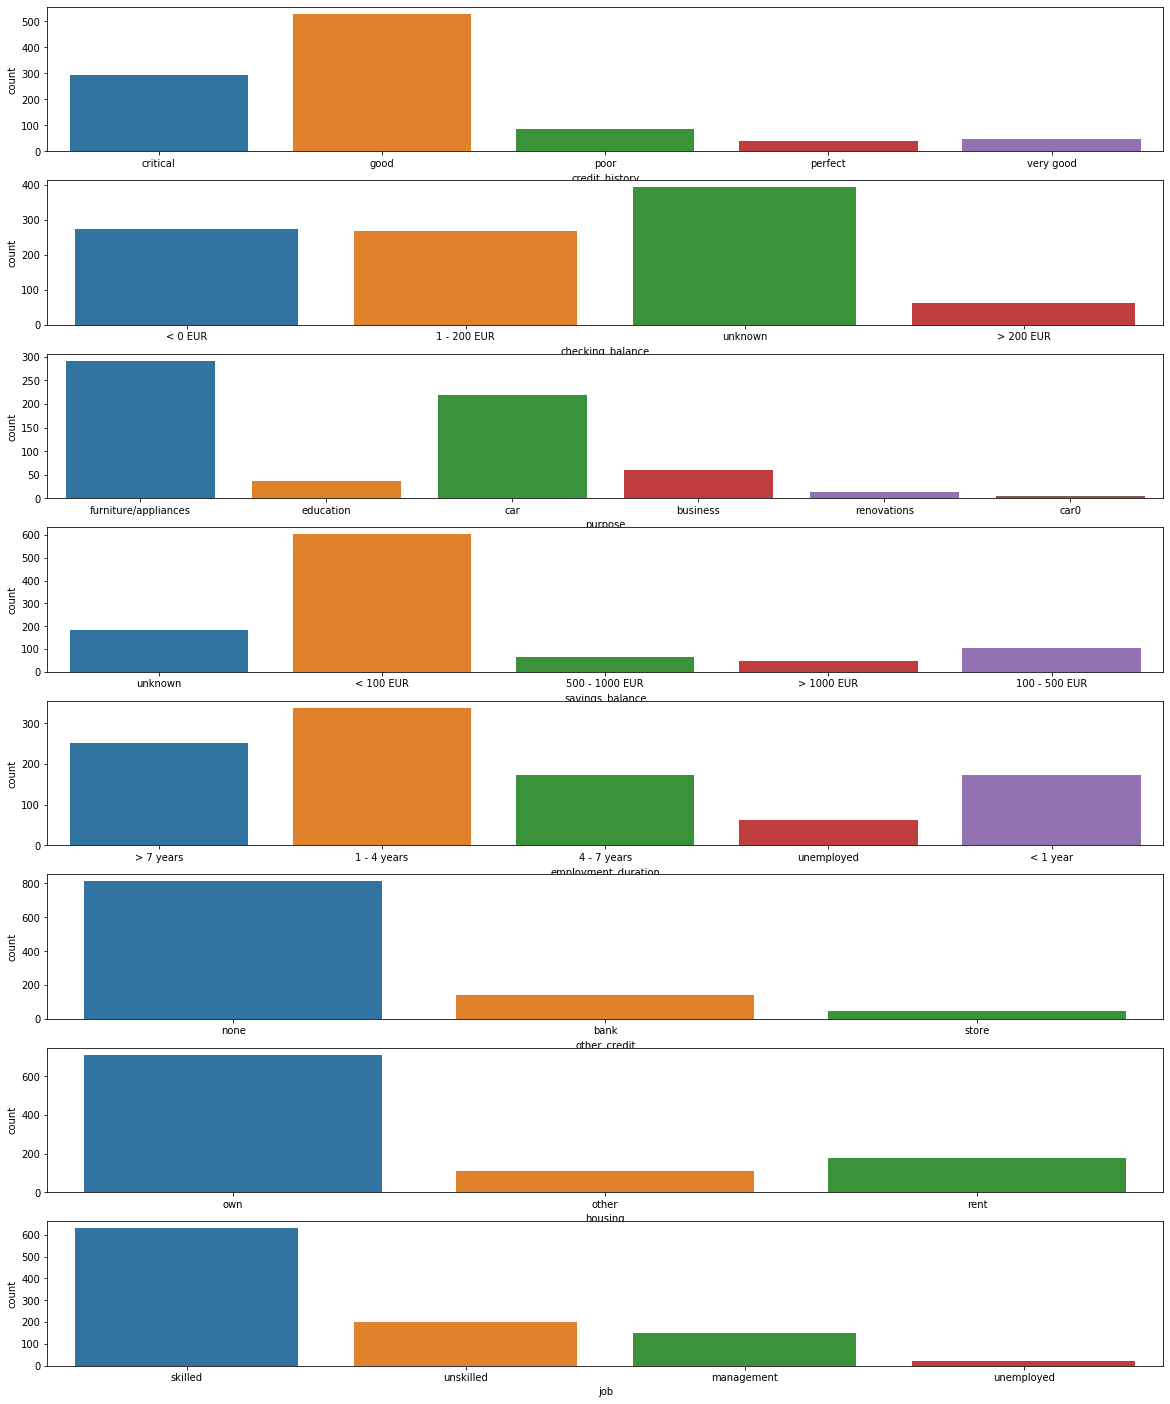

In [8]:
#checking the distribution of categorical data
fig,(ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(20,25))
sns.countplot(x='credit_history', data=modified_data, ax=ax1)
sns.countplot(x='checking_balance', data=modified_data, ax=ax2)
sns.countplot(x='purpose', data=modified_data, ax=ax3) 
sns.countplot(x='savings_balance', data=modified_data, ax=ax4)
sns.countplot(x='employment_duration', data=modified_data, ax=ax5)
sns.countplot(x='other_credit', data=modified_data, ax=ax6)
sns.countplot(x='housing', data=modified_data, ax=ax7)
sns.countplot(x='job', data=modified_data, ax=ax8) 

#in the third chart, we have 'car' and 'car0' as two purposes, and that looks like a typo

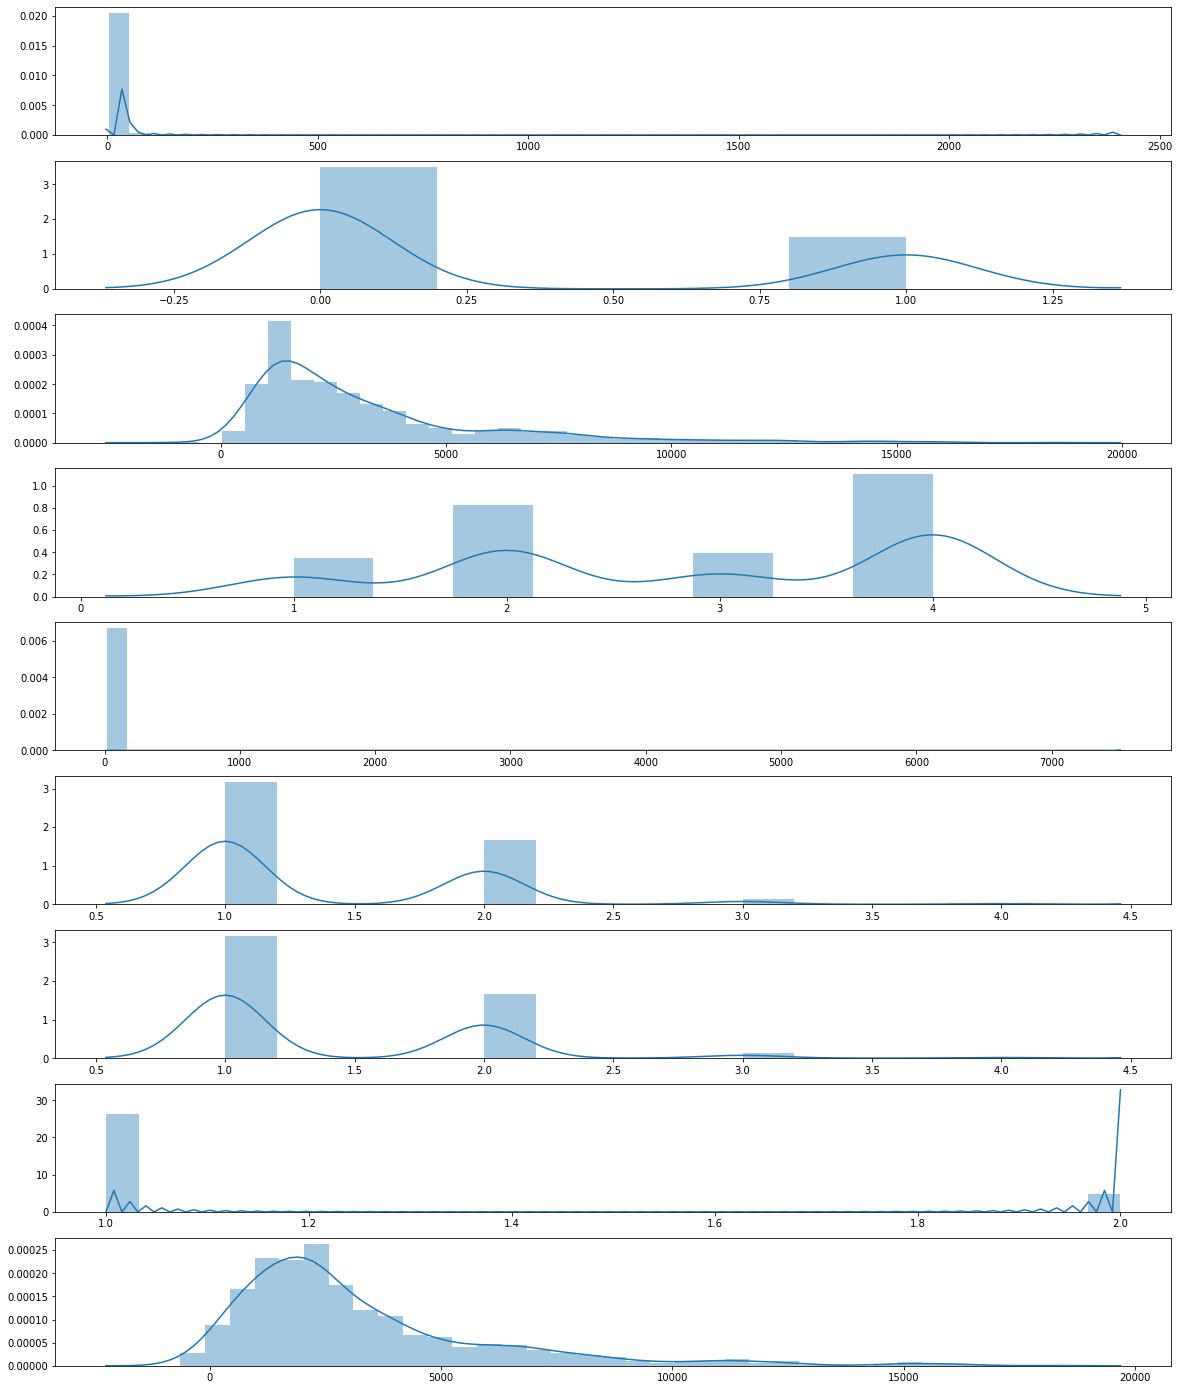

In [9]:
#checking the distribution of numerical data
fig,(ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, figsize=(20,25))

sns.distplot(pd.DataFrame(modified_data, columns = ['months_loan_duration']), ax=ax1) #check outliers
sns.distplot(pd.DataFrame(modified_data, columns = ['default']), ax=ax2) #
sns.distplot(pd.DataFrame(modified_data, columns = ['amount']), ax=ax3)
sns.distplot(pd.DataFrame(modified_data, columns = ['years_at_residence']), ax=ax4)
sns.distplot(pd.DataFrame(modified_data, columns = ['age']), ax=ax5) #check outliers
sns.distplot(pd.DataFrame(modified_data, columns = ['existing_loans_count']), ax=ax6)
sns.distplot(pd.DataFrame(modified_data, columns = ['existing_loans_count']), ax=ax7)
sns.distplot(pd.DataFrame(modified_data, columns = ['dependents']), ax=ax8)
sns.distplot(pd.DataFrame(modified_data, columns = ['monthlyincome']), ax=ax9)

#'months_loan_duration' and 'age' are strangely distributed 
#(and as we know from our previous homework we do have some outliers there)

In [10]:
#if we print out the 5 largest values of 'months_loan_duration' column, we can see an unusual value of 2400
modified_data.nlargest(5, 'months_loan_duration')

,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome
962,0,unknown,2400,good,car,3556,unknown,1 - 4 years,2,29,none,own,1,skilled,1,2681
677,1,1 - 200 EUR,72,good,furniture/appliances,5595,100 - 500 EUR,1 - 4 years,2,24,none,own,1,skilled,1,5130
29,1,< 0 EUR,60,poor,business,6836,< 100 EUR,> 7 years,4,63,none,own,2,skilled,1,6141
134,0,unknown,60,good,NaN,10144,100 - 500 EUR,4 - 7 years,4,21,none,own,1,skilled,1,9644
255,0,1 - 200 EUR,60,poor,NaN,7418,unknown,1 - 4 years,1,27,none,own,1,unskilled,1,7822


In [11]:
#same goes to the 'age' column where we have a value of 7500
modified_data.nlargest(5, 'age')

,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome
7,0,1 - 200 EUR,36,good,car,6948,< 100 EUR,1 - 4 years,2,7500,none,rent,1,management,1,6292
330,0,< 0 EUR,24,critical,NaN,6615,< 100 EUR,unemployed,4,75,none,other,2,management,1,5686
536,0,< 0 EUR,6,good,car,1374,unknown,unemployed,3,75,none,own,1,management,1,2264
186,1,1 - 200 EUR,9,very good,NaN,5129,< 100 EUR,> 7 years,4,74,bank,other,1,management,2,6063
430,0,unknown,5,good,NaN,3448,< 100 EUR,4 - 7 years,4,74,none,own,1,unskilled,1,3742


In [12]:
#dropping rows with '2400' and '7500' values for 'months_loan_duration' and 'age' columns respectively
modified_data.drop(data[data['months_loan_duration'] == 2400].index, inplace = True)
modified_data.drop(data[data['age'] == 7500].index, inplace = True)

In [13]:
modified_data.describe()
#we can see that the min value in the 'amount' column is -1000, and that looks like an outlier as well

,default,months_loan_duration,amount,years_at_residence,age,existing_loans_count,dependents,monthlyincome
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.300601,20.893788,3262.667335,2.846693,35.553106,1.407816,1.155311,3264.379760
std,0.458749,12.059978,2826.357177,1.104175,11.384970,0.577946,0.362382,2873.280954
min,0.000000,4.000000,-1000.000000,1.000000,19.000000,1.000000,1.000000,-630.000000
25%,0.000000,12.000000,1364.000000,2.000000,27.000000,1.000000,1.000000,1409.500000
50%,0.000000,18.000000,2309.000000,3.000000,33.000000,1.000000,1.000000,2386.000000
75%,1.000000,24.000000,3970.500000,4.000000,42.000000,2.000000,1.000000,4127.000000
max,1.000000,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000,18078.000000


In [14]:
modified_data.nsmallest(5, 'amount')

,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome
537,0,1 - 200 EUR,18,critical,furniture/appliances,-1000,< 100 EUR,> 7 years,4,37,none,own,1,skilled,1,3869
725,0,unknown,6,critical,car,250,> 1000 EUR,1 - 4 years,2,41,bank,own,2,unskilled,1,-492
309,0,1 - 200 EUR,9,good,NaN,276,< 100 EUR,1 - 4 years,4,22,none,rent,1,unskilled,1,-630
177,0,< 0 EUR,6,critical,NaN,338,500 - 1000 EUR,> 7 years,4,52,none,own,2,skilled,1,1011
157,0,< 0 EUR,12,very good,NaN,339,< 100 EUR,> 7 years,1,45,bank,own,1,unskilled,1,1300


In [15]:
#dropping a row with '-1000' value  
modified_data.drop(data[data['amount'] < 0].index, inplace = True)

In [16]:
#getting back to fixing a typo in the purpose column

#checking the sum of values for each of the variables in 'purpose' column
modified_data['purpose'].value_counts()

furniture/appliances    291
car                     218
business                 61
education                37
renovations              13
car0                      6
Name: purpose, dtype: int64

In [17]:
modified_data['purpose'].replace('car0', 'car', inplace=True)

In [18]:
#checking the sum of values after replacing the name of a variable
modified_data['purpose'].value_counts()

furniture/appliances    291
car                     224
business                 61
education                37
renovations              13
Name: purpose, dtype: int64

In [19]:
#When we look at the output above when we sorted the data or if we check a random sample (below), 
#we can see that we have some missing values in the 'purpose' column

modified_data.sample(5)


,default,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,monthlyincome
125,0,< 0 EUR,12,critical,NaN,2121,< 100 EUR,1 - 4 years,2,30,none,own,2,skilled,1,1744
229,0,< 0 EUR,24,good,NaN,3149,< 100 EUR,< 1 year,1,22,bank,other,1,skilled,1,3261
335,1,< 0 EUR,6,critical,NaN,3384,< 100 EUR,1 - 4 years,4,44,none,rent,1,management,1,2553
369,0,1 - 200 EUR,18,good,NaN,3001,< 100 EUR,4 - 7 years,4,40,none,rent,1,skilled,1,3170
662,0,unknown,21,good,furniture/appliances,2241,< 100 EUR,> 7 years,2,50,none,own,2,skilled,1,1556


In [20]:
#checking the amount of missing values
missing_values_count = modified_data.isnull().sum()
missing_values_count

default                   0
checking_balance          0
months_loan_duration      0
credit_history            0
purpose                 371
amount                    0
savings_balance           0
employment_duration       0
years_at_residence        0
age                       0
other_credit              0
housing                   0
existing_loans_count      0
job                       0
dependents                0
monthlyincome             0
dtype: int64

In [21]:
#replacing empty values with 'unknown' 
modified_data['purpose'].fillna('unknown', inplace = True)

In [22]:
#the sum of values in 'purpose' column after we updated the data 
modified_data['purpose'].value_counts()

unknown                 371
furniture/appliances    291
car                     224
business                 61
education                37
renovations              13
Name: purpose, dtype: int64

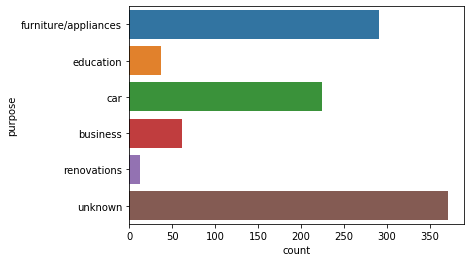

In [23]:
#we can see that the amount of unknown values in the 'purpose' column is really high
sns.countplot(y='purpose', data=modified_data)

In [24]:
#now our dataset consists of 997 rows as we have dropped 3 of them earlier 
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 16 columns):
default                 997 non-null int64
checking_balance        997 non-null object
months_loan_duration    997 non-null int64
credit_history          997 non-null object
purpose                 997 non-null object
amount                  997 non-null int64
savings_balance         997 non-null object
employment_duration     997 non-null object
years_at_residence      997 non-null int64
age                     997 non-null int64
other_credit            997 non-null object
housing                 997 non-null object
existing_loans_count    997 non-null int64
job                     997 non-null object
dependents              997 non-null int64
monthlyincome           997 non-null int64
dtypes: int64(8), object(8)
memory usage: 172.4+ KB
